<a href="https://colab.research.google.com/github/Kuzay3t/Image-Classification/blob/main/Copy_of_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Starter Notebook

Welcome to the Image Classification Starter Notebook for our Hacktoberfest competition! 🚀

In this notebook, you'll find a ready-to-use Python script that provides a solid foundation for building an image classifier to classify buildings into three classes: Bungalow, Highrise, and Storey buildings.

## Getting Started

To get started, follow these steps:

1. **Clone the Repository**: Begin by cloning this repository to your local machine.

2. **Organize Your Data**: Ensure that your image data is organized in the `Data` directory, with subdirectories for each class (`Bungalow`, `Highrise`, `Storey-Building`).

3. **Open the Notebook**: Open this notebook in a Jupyter environment.

4. **Follow the Code**: The notebook contains commented code that guides you through the process of setting up the data, building and training the model, and evaluating its performance.

5. **Experiment and Contribute**: Feel free to experiment with different architectures, hyperparameters, or augmentation techniques. If you come up with improvements, consider contributing them back to the project!

## Important Notes

- Ensure that you have TensorFlow and related dependencies installed in your environment.
- If you encounter any issues or have questions, don't hesitate to reach out. We're here to help!

Happy coding, and let's build an amazing image classifier together!


In [46]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import random_split

In [11]:
!ls /content


'Building Types.zip'   model1.h5   model2.h5   model3.h5   my_folder   sample_data


In [12]:
import zipfile
import os

zip_file_path = "/content/your_uploaded_file.zip"
import zipfile
import os

zip_file_path = "/content/your_uploaded_file.zip"
# Extracting
extract_path = "/content/my_folder"
with zipfile.ZipFile("Building Types.zip", "r") as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
print("Extracted files:", os.listdir(extract_path))
# Verify extraction
print("Extracted files:", os.listdir(extract_path))


Extracted files: ['__MACOSX', 'Building Types']
Extracted files: ['__MACOSX', 'Building Types']


# Define Constants

In [13]:

IMAGE_HEIGHT = 400 # The height the image is to be resized to
IMAGE_WIDTH = 300 # The width the image is to be resized to
BATCH_SIZE = 32

# Define paths for data
data_dir = 'data' # Ensure the name of the folder is set to this.
class_names = ['Bungalow', 'Highrise', 'Storey-Building']



# Implement Data Generators and Preprocessing pipeline

**This will create an easy preprocessing pipeline and will help load your data in batches**

In [21]:
# Set up data generators for training and testing
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0,1]
    validation_split=0.2,      # 20% of data will be used for validation
    rotation_range=40,          # Rotate images by up to 40 degrees
    width_shift_range=0.2,     # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,    # Shift images vertically by up to 20% of the height
    shear_range=0.2,           # Apply shear transformations
    zoom_range=0.2,            # Zoom in or out by up to 20%
    horizontal_flip=True,       # Flip images horizontally
    fill_mode='nearest'         # Fill in missing pixels using the nearest neighbor
)

data_dir = 'my_folder/Building Types'

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Define test data generator
# Assuming you have a separate directory for test data called 'test_data'
#test_data_dir = 'my_folder/Building Types'  # Replace with your actual test data directory
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)



Found 959 images belonging to 3 classes.
Found 238 images belonging to 3 classes.
Found 1197 images belonging to 3 classes.


**Load InceptionV3 and Fine-Tune the Model**

In [15]:
#Loading the pre-trained model InceptionV3
inception_model = tf.keras.applications.InceptionV3(
    weights='imagenet',  # Loading weights pre-trained on ImageNet
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))  # image dimensions

# load vgg16
vgg_model = VGG16(weights='imagenet',
                     include_top=False,
                     input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

# Freezing the layers in the base model
inception_model.trainable = False
vgg_model.trainable = False



# Model architecture

In [16]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add a dropout layer with a rate of 0.5
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for building types
])

# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



# Train the model

In [8]:
# traning the model
# Assign the 'model' instance to 'model1', 'model2', and 'model3'
model1 = model
model2 = model
model3 = model
history1 = model1.fit(train_generator, epochs=10, validation_data=validation_generator)
history2 = model2.fit(train_generator, epochs=10, validation_data=validation_generator)
history3 = model3.fit(train_generator, epochs=10, validation_data=validation_generator)
# This part of the code allows you to train the model. You can decide to tweak the number of epochs by experimenting with different values.
# Rule of thumb: Avoid using too large epochs, to avoid overfitting.

# saving the trained model
model1.save("model1.h5")
model2.save("model2.h5")
model3.save("model3.h5")



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 168s 6s/step - accuracy: 0.4431 - loss: 12.0929 - val_accuracy: 0.5210 - val_loss: 1.0416
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.5356 - loss: 1.0657 - val_accuracy: 0.5210 - val_loss: 1.1089
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.5284 - loss: 1.0019 - val_accuracy: 0.5294 - val_loss: 0.9990
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 211s 6s/step - accuracy: 0.5590 - loss: 0.9051 - val_accuracy: 0.5462 - val_loss: 1.0433
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.5063 - loss: 0.8773 - val_accuracy: 0.5546 - val_loss: 0.9479
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 160s 5s/step - accuracy: 0.5734 - loss: 0.8601 - val_accuracy: 0.5630 - val_loss: 0.9313
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 175s 6s/step - accuracy: 0.5139 - loss: 0.8854 - val_accuracy: 0.5000 - val_loss: 1.0248
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 189s 5s/step - accuracy: 0.5465 - loss: 0.9034 - val_accuracy: 0.5294 - 

In [22]:
# loading the trained model

model1 = tf.keras.models.load_model("model1.h5")
model2 = tf.keras.models.load_model("model2.h5")
model3 = tf.keras.models.load_model("model3.h5")


test_images, test_labels = next(test_generator)  # Get test images

# Get predictions from each model
pred1 = model1.predict(test_images)
pred2 = model2.predict(test_images)
pred3 = model3.predict(test_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [24]:
# computing averaged predictions

final_pred = (pred1 + pred2 + pred3) / 3  # Simple averaging
final_classes = np.argmax(final_pred, axis=1)  # Get final predicted class


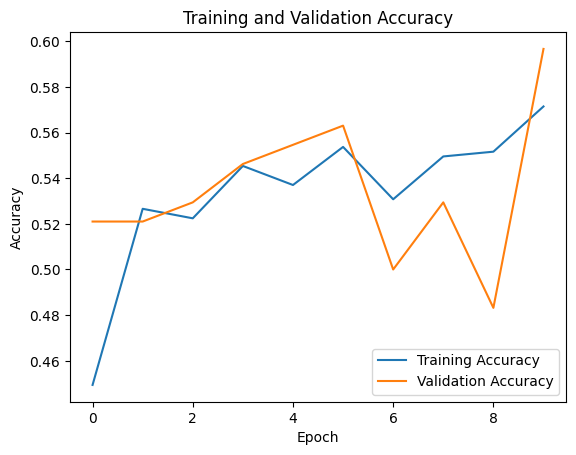

In [26]:
# Plot training and validation accuracy
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model

In [27]:
true_classes = np.argmax(test_labels, axis=1)  # Get true class labels
accuracy = accuracy_score(true_classes, final_classes)

print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")



Ensemble Model Accuracy: 46.88%


# Save the Model

In [29]:
path_to_save_model = 'path_to_save_model.keras'  # Or 'path_to_save_model.h5'

# Save the entire model (including architecture, weights, and optimizer state)
model.save(path_to_save_model)

## **Changes made by Bagai Glory**


1.   I included Data Augumentation parameters withing the ImageDataGenrator
2.   Fine tuning the model using InceptionV3
3. Included the dropout function to manage overfitting in the data.
4. Implemented a learning rate schedule Adam.
5. I included Ensembling Techniques by combining multiple models to improve the accuracy of the final model.
6.  I Leveraged Transfer Learning for Improved Performance


## **Train and Test with Tensorflow**

Train, test and validation on image classification with tensorflow and pytorch.

The data was split into the training and test data. the training data set is used to train the model, the validation data set it used to validate the model whilst it is training and the test set is used to assess the model once training is complete

Understanding Train, Test, and Validation Sets:
Training Set: This is the data used to train the model. The model learns from this data by adjusting its internal parameters.

Validation Set: This set is used to validate the model's performance during training, allowing me to fine-tune the hyperparameters and avoid overfitting. It's used while the model is being trained to check how well the model generalizes on unseen data.

Test Set: This data is kept completely unseen by the model during training and validation. It's used at the end to evaluate the model's final performance. This helps in estimating how well the model will perform on real-world data.

Key Points for the Notebook
Training with validation: During training, the validation_data argument allows you to evaluate the model at the end of each epoch using the validation set.
Testing: After training, you use the evaluate() method to assess your model's performance on the test set, which has been completely unseen by the model.

When to Use Just Train and Test:
If you don’t want to use a validation set, you can just split the dataset into training and testing. However, this is generally not recommended for deep learning tasks because it can lead to overfitting and unreliable evaluations.

Pros of using train, validation, and test splits: It gives a better estimate of how well the model generalizes to unseen data, and it allows hyperparameter tuning based on validation performance.
Cons of using only train and test: Without a validation set, you risk overfitting your model because there's no internal mechanism to check generalization during training.










## **Model Implementation with Pytorch**

**Setting Code Directory**

In [40]:
# the paths for the ZIP file and extraction directory
zip_file_path = "/content/Building Types.zip"  # Ensure this path is correct
extract_path = "/content/my_folder"

# Extraction of the ZIP file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# Verifying extraction
print("Extracted files:", os.listdir(extract_path))

Extracted files: ['__MACOSX', 'Building Types']


**Defining Constants **

In [51]:

IMAGE_HEIGHT = 400 # The height the image is to be resized to
IMAGE_WIDTH = 300 # The width the image is to be resized to
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 10

# Define paths for data
DATA_DIR = '/content/my_folder/Building Types'
class_names = ['Bungalow', 'Highrise', 'Storey-Building']


In [42]:
# Defining data augmentation and normalization transforms
# For training, I included several random transformations similar to ImageDataGenerator
train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH)),
    transforms.RandomRotation(40),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop((IMAGE_HEIGHT, IMAGE_WIDTH), scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # Using ImageNet statistics
                         [0.229, 0.224, 0.225])
])

In [43]:
# For validation and testing, only resize and normalize
val_test_transforms = transforms.Compose([
    transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [44]:
# Loading the dataset using ImageFolder. The images will be organized into subdirectories by class.
full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=train_transforms)
dataset_size = len(full_dataset)
print(f"Total images found: {dataset_size}")


Total images found: 1197


Definiing Model Architecture

In [47]:
# Spliting dataset into train (80%), validation (10%), and test (10%)
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = dataset_size - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

In [48]:
# Overriding the transform for validation and test datasets to use val_test_transforms
val_dataset.dataset.transform = val_test_transforms
test_dataset.dataset.transform = val_test_transforms

In [49]:
# Creating DataLoaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [52]:
# Definin a simple CNN model similar
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # Calculate the size of the feature maps after two pooling layers.
        # With two 2x2 poolings, the height and width will be divided by 4.
        final_height = IMAGE_HEIGHT // 4
        final_width = IMAGE_WIDTH // 4
        self.flattened_size = 32 * final_height * final_width

        # Fully connected layers
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

**Model Instance**

In [53]:
model = BuildingClassifier()

**Optimizer & Loss Function**

In [54]:
# Initializing the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=NUM_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


**Training the Model**

In [56]:
# Training loop
print("Starting training...")
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / train_size
    epoch_acc = running_corrects.double() / train_size
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)

    val_epoch_loss = val_loss / val_size
    val_epoch_acc = val_corrects.double() / val_size
    print(f"Validation - Loss: {val_epoch_loss:.4f} Acc: {val_epoch_acc:.4f}")



Starting training...
Epoch 1/10 - Loss: 0.8645 Acc: 0.6061
Validation - Loss: 0.7626 Acc: 0.6555
Epoch 2/10 - Loss: 0.6242 Acc: 0.7189
Validation - Loss: 0.6898 Acc: 0.6387
Epoch 3/10 - Loss: 0.4284 Acc: 0.8359
Validation - Loss: 0.6960 Acc: 0.6639
Epoch 4/10 - Loss: 0.3245 Acc: 0.8746
Validation - Loss: 0.7570 Acc: 0.6891
Epoch 5/10 - Loss: 0.1804 Acc: 0.9478
Validation - Loss: 0.9105 Acc: 0.6555
Epoch 6/10 - Loss: 0.1364 Acc: 0.9613
Validation - Loss: 0.7583 Acc: 0.6975
Epoch 7/10 - Loss: 0.0875 Acc: 0.9781
Validation - Loss: 0.9437 Acc: 0.6723
Epoch 8/10 - Loss: 0.0804 Acc: 0.9791
Validation - Loss: 0.8843 Acc: 0.6807
Epoch 9/10 - Loss: 0.0514 Acc: 0.9854
Validation - Loss: 0.9779 Acc: 0.6807
Epoch 10/10 - Loss: 0.0358 Acc: 0.9906
Validation - Loss: 1.0999 Acc: 0.6723


**Testing the Model**

In [57]:
# Testing phase
model.eval()
test_corrects = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_corrects += torch.sum(preds == labels.data)

test_accuracy = test_corrects.double() / test_size
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.5950


**Save the Model**

In [58]:
# save the model
torch.save(model.state_dict(), "pytorch_model.pth")
print("Model saved as pytorch_model.pth")

Model saved as pytorch_model.pth


In [59]:
!git add .
!git commit -m "updated version: the model was also trained with pytorch in this notebook"
!git push origin main  # Or replace 'main' with your branch name


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
